In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.under_sampling import RandomUnderSampler

In [5]:
bank_additional = pd.read_csv("Data/bank-additional/bank-additional/bank-additional.csv", delimiter=";")

bank_additional.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [6]:
numerical_features = ['age','duration','campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [8]:
cv = StratifiedKFold(n_splits=5)

X = bank_additional.drop('y', axis=1)
y = bank_additional['y'].apply(lambda x: 1 if x == 'yes' else 0)

In [9]:
classifier2 = KNeighborsClassifier()
main_pipeline2 = Pipeline(steps=[('preprocessor',
                                  preprocessor),('classifier', classifier2)])

for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    undersample = RandomUnderSampler(sampling_strategy='majority')
    X_under, y_under = undersample.fit_resample(X_train, y_train)
    
    main_pipeline2.fit(X_under, y_under)

    # evaluate the model
    scores = cross_val_score(main_pipeline2, X_test, y_test, scoring='accuracy')
    print('Mean Accuracy: %.3f' % np.mean(scores))


Mean Accuracy: 0.920
Mean Accuracy: 0.897
Mean Accuracy: 0.909
Mean Accuracy: 0.894
Mean Accuracy: 0.887


In [10]:
classifier3 = DecisionTreeClassifier()

main_pipeline3 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', classifier3)])

for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    undersample = RandomUnderSampler(sampling_strategy='majority')
    X_under, y_under = undersample.fit_resample(X_train, y_train)
    
    main_pipeline3.fit(X_under, y_under)

    # evaluate the model
    scores = cross_val_score(main_pipeline3, X_test, y_test, scoring='accuracy')
    print('Mean Accuracy: %.3f' % np.mean(scores))

Mean Accuracy: 0.887
Mean Accuracy: 0.865
Mean Accuracy: 0.883
Mean Accuracy: 0.865
Mean Accuracy: 0.903


IndexError: index 38 is out of bounds for axis 0 with size 20

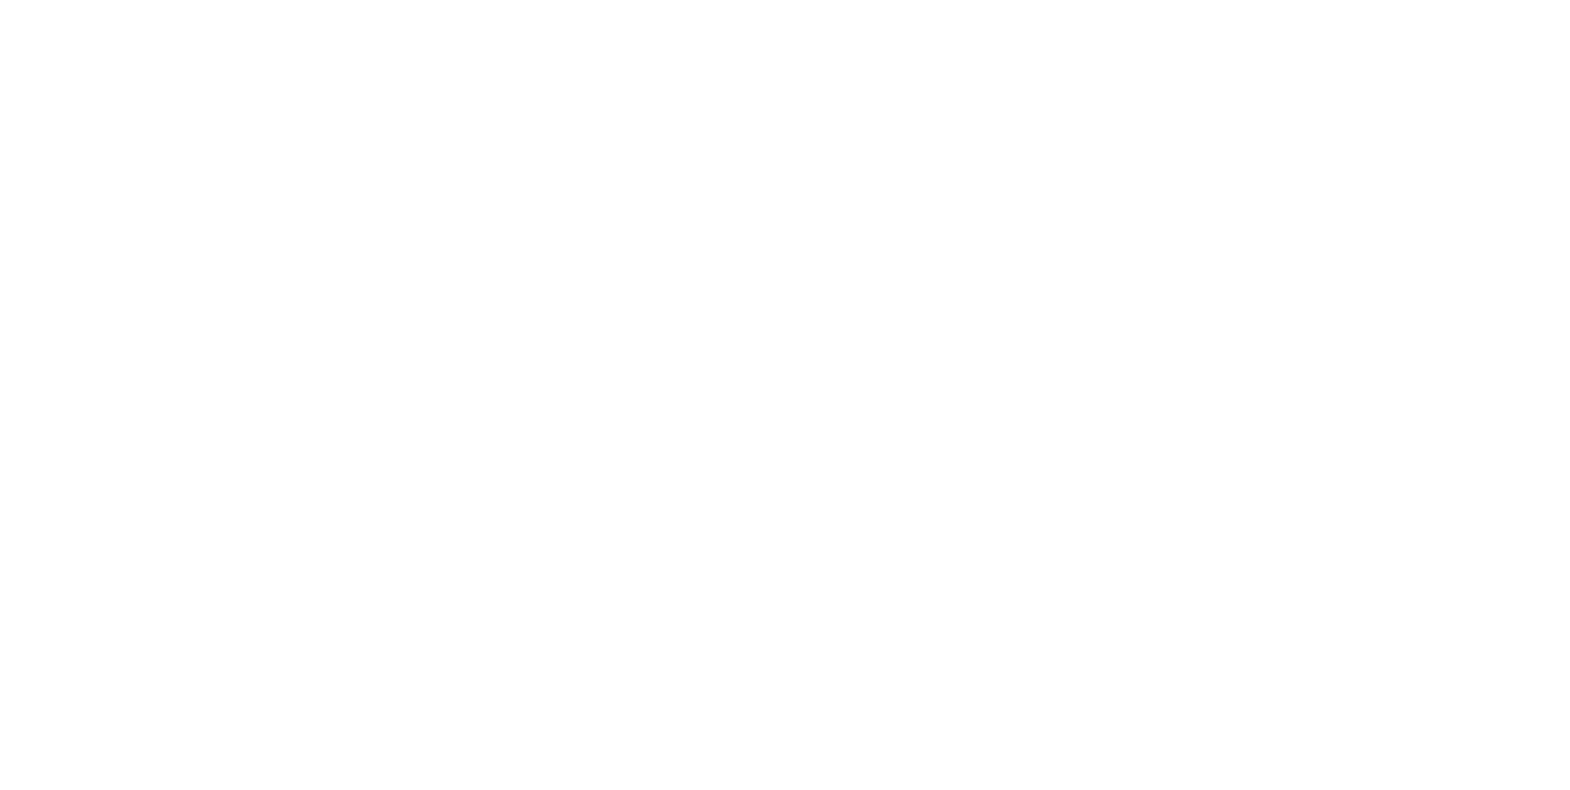

In [11]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# After fitting the DecisionTreeClassifier
# Extract the decision tree from the pipeline
decision_tree = main_pipeline3['classifier']

plt.figure(figsize=(20,10))
plot_tree(decision_tree, feature_names=X.columns, class_names=['no', 'yes'], filled=True)
plt.show()

In [ ]:
from sklearn.model_selection import StratifiedKFold
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Assuming that bank_additional is your DataFrame and 'target' is your target variable
X = bank_additional.drop('target', axis=1)
y = bank_additional['target']

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5)

# Initialize the classifier
clf = RandomForestClassifier()

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply the random under-sampling
    rus = RandomUnderSampler()
    X_res, y_res = rus.fit_resample(X_train, y_train)

    # Fit and predict
    clf.fit(X_res, y_res)
    predictions = clf.predict(X_test)

    # Compute accuracy
    accuracy = accuracy_score(y_test, predictions)
    print('Accuracy: ', accuracy)


Decision Tree Model
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7310
           1       0.70      0.05      0.09       928

    accuracy                           0.89      8238
   macro avg       0.80      0.52      0.51      8238
weighted avg       0.87      0.89      0.85      8238


KNN Models
KNN with k=1
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      7310
           1       0.20      0.16      0.17       928

    accuracy                           0.83      8238
   macro avg       0.55      0.54      0.54      8238
weighted avg       0.82      0.83      0.82      8238
KNN with k=2
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7310
           1       0.45      0.09      0.15       928

    accuracy                           0.88      8238
   macro avg       0.67      0.54      0.55      8238
weighted avg    

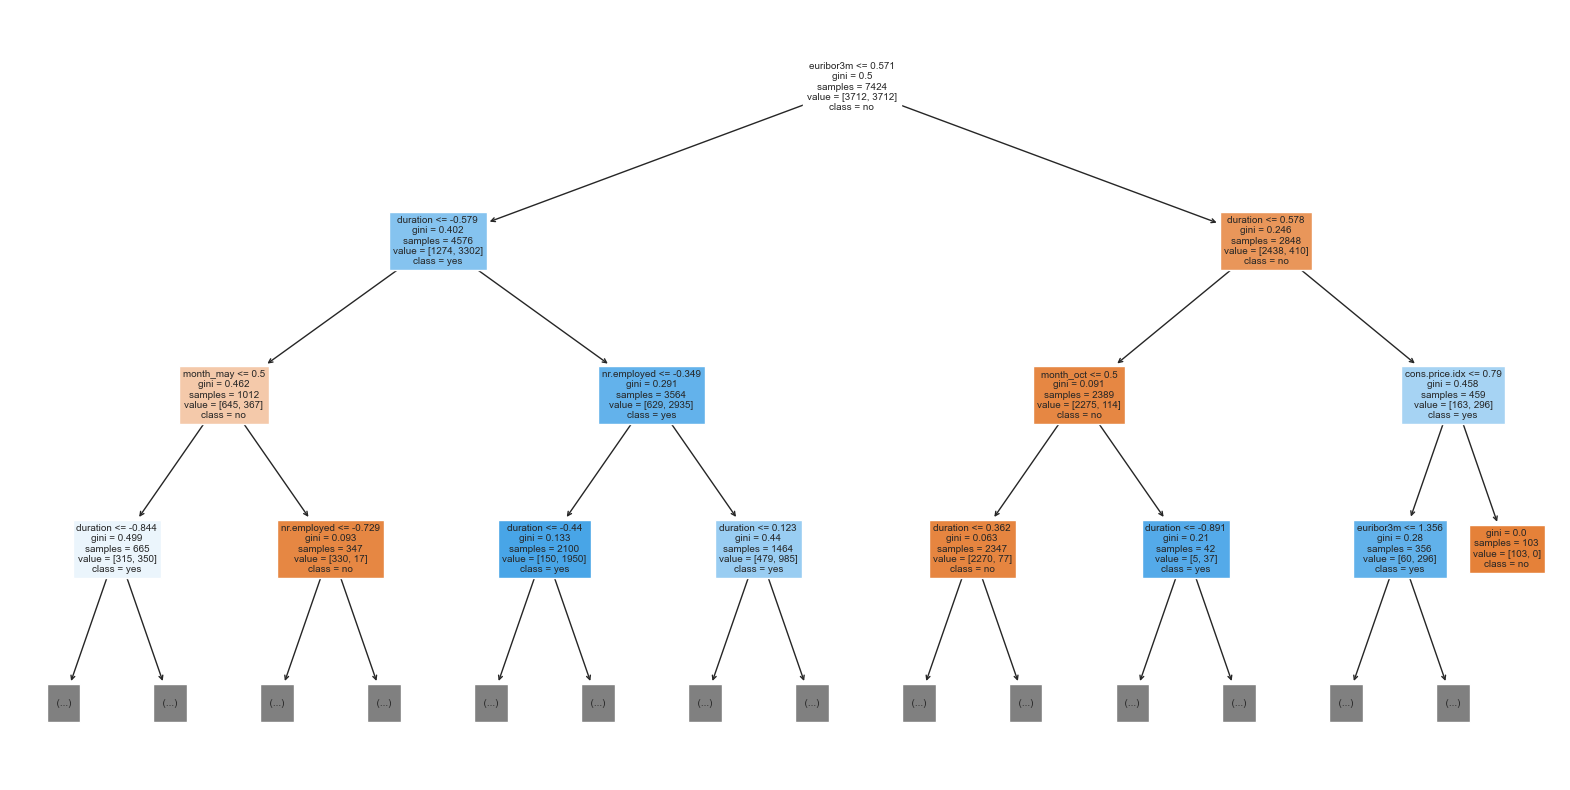

Best k for KNN in this fold: 19 with accuracy: 0.897

Decision Tree Model
              precision    recall  f1-score   support

           0       0.77      0.38      0.51      7310
           1       0.03      0.13      0.04       928

    accuracy                           0.35      8238
   macro avg       0.40      0.25      0.27      8238
weighted avg       0.69      0.35      0.45      8238


KNN Models
KNN with k=1
              precision    recall  f1-score   support

           0       0.85      0.52      0.65      7310
           1       0.07      0.28      0.11       928

    accuracy                           0.49      8238
   macro avg       0.46      0.40      0.38      8238
weighted avg       0.76      0.49      0.59      8238
KNN with k=2
              precision    recall  f1-score   support

           0       0.87      0.72      0.79      7310
           1       0.06      0.15      0.09       928

    accuracy                           0.65      8238
   macro avg     

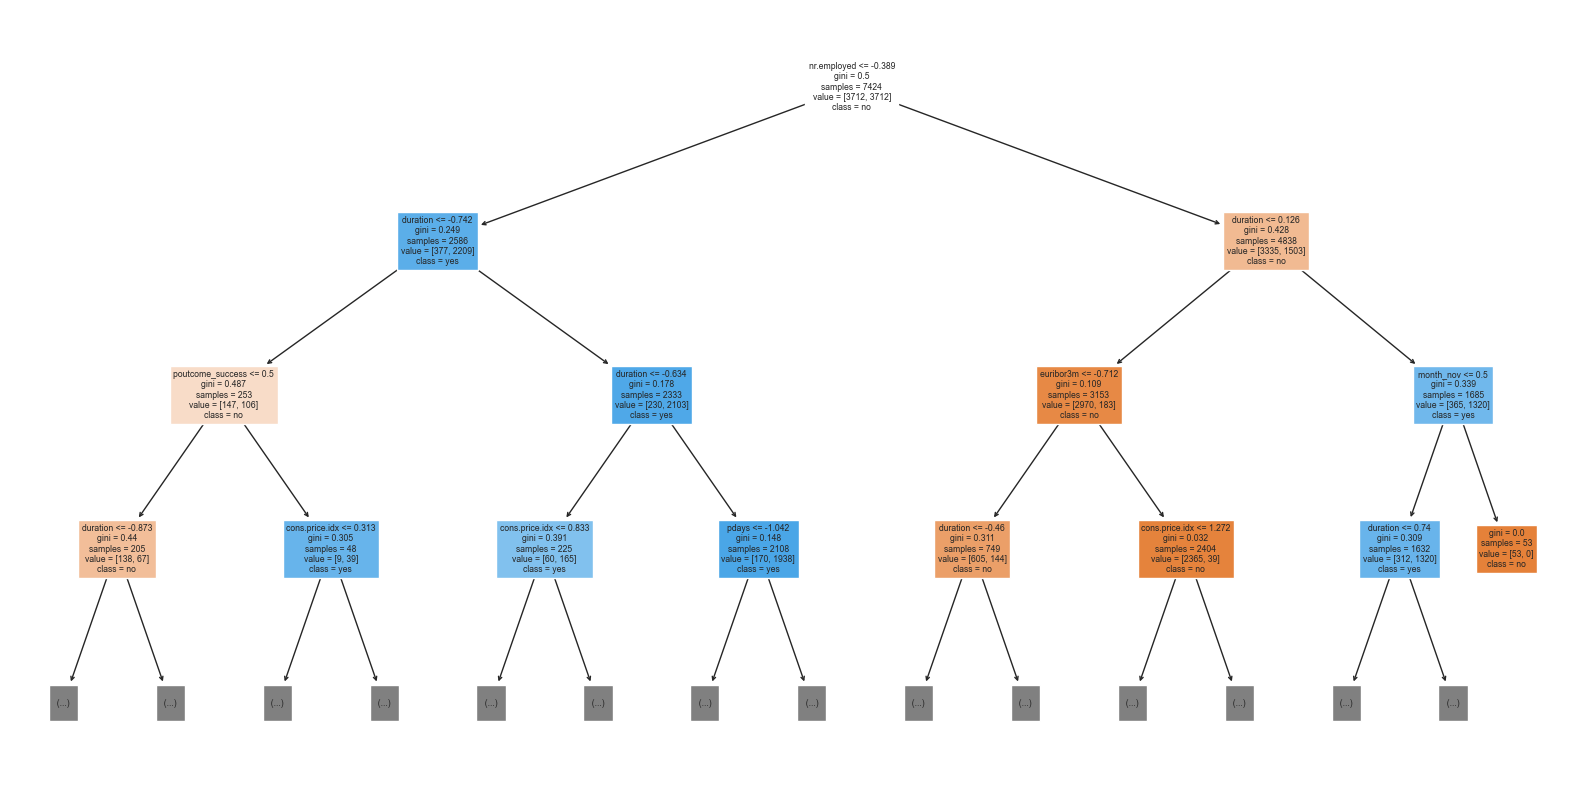

Best k for KNN in this fold: 20 with accuracy: 0.738

Decision Tree Model
              precision    recall  f1-score   support

           0       0.84      0.61      0.71      7310
           1       0.03      0.09      0.04       928

    accuracy                           0.55      8238
   macro avg       0.43      0.35      0.37      8238
weighted avg       0.75      0.55      0.63      8238


KNN Models
KNN with k=1
              precision    recall  f1-score   support

           0       0.87      0.64      0.74      7310
           1       0.08      0.24      0.12       928

    accuracy                           0.59      8238
   macro avg       0.47      0.44      0.43      8238
weighted avg       0.78      0.59      0.67      8238
KNN with k=2
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      7310
           1       0.09      0.13      0.11       928

    accuracy                           0.74      8238
   macro avg     

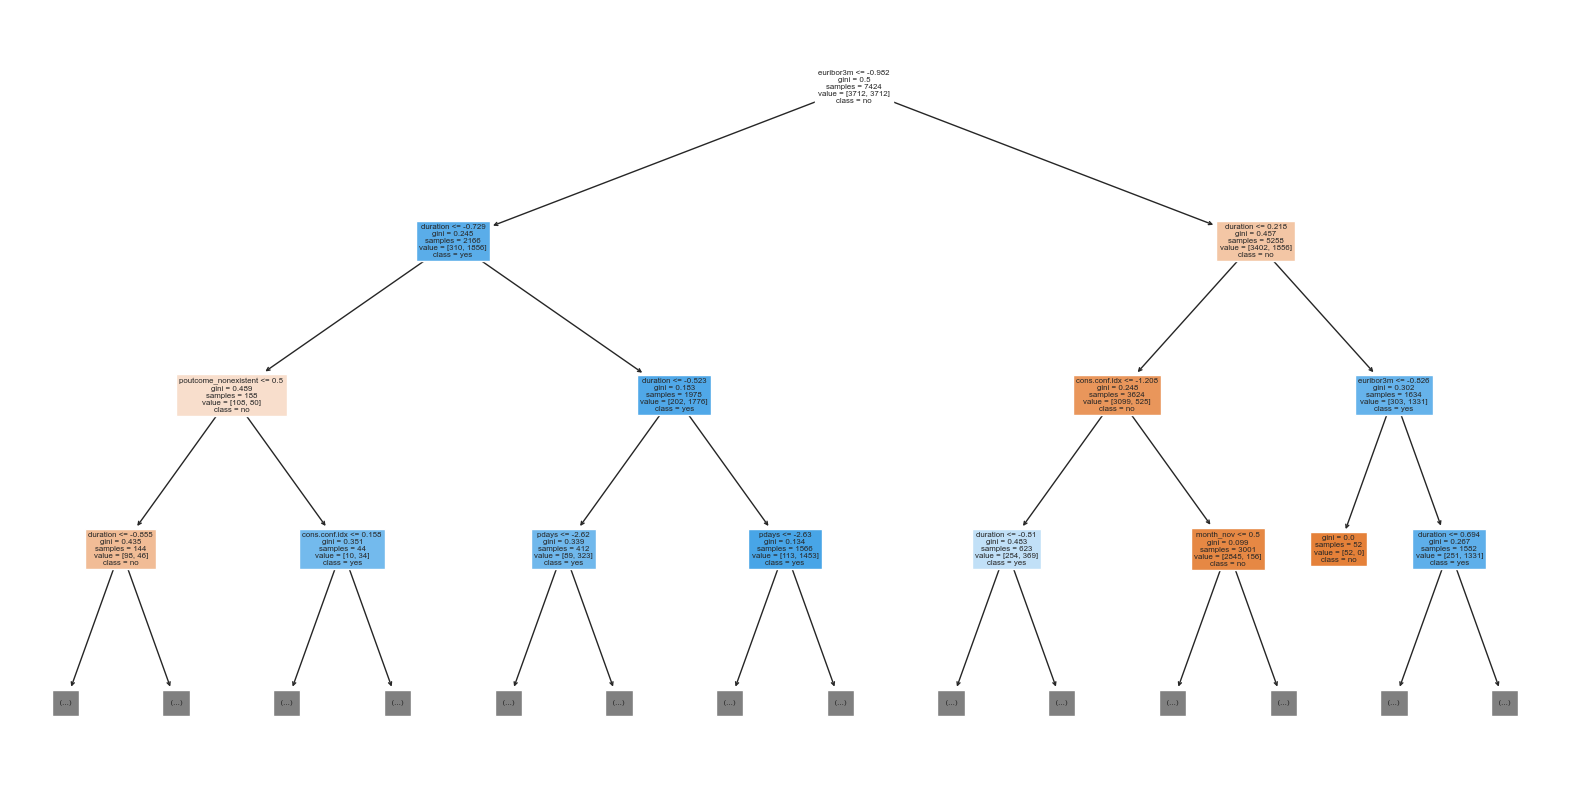

Best k for KNN in this fold: 2 with accuracy: 0.743

Decision Tree Model
              precision    recall  f1-score   support

           0       0.56      0.15      0.23      7309
           1       0.01      0.10      0.03       928

    accuracy                           0.14      8237
   macro avg       0.29      0.12      0.13      8237
weighted avg       0.50      0.14      0.21      8237


KNN Models
KNN with k=1
              precision    recall  f1-score   support

           0       0.74      0.26      0.38      7309
           1       0.05      0.28      0.08       928

    accuracy                           0.26      8237
   macro avg       0.39      0.27      0.23      8237
weighted avg       0.66      0.26      0.35      8237
KNN with k=2
              precision    recall  f1-score   support

           0       0.77      0.36      0.49      7309
           1       0.03      0.16      0.05       928

    accuracy                           0.34      8237
   macro avg      

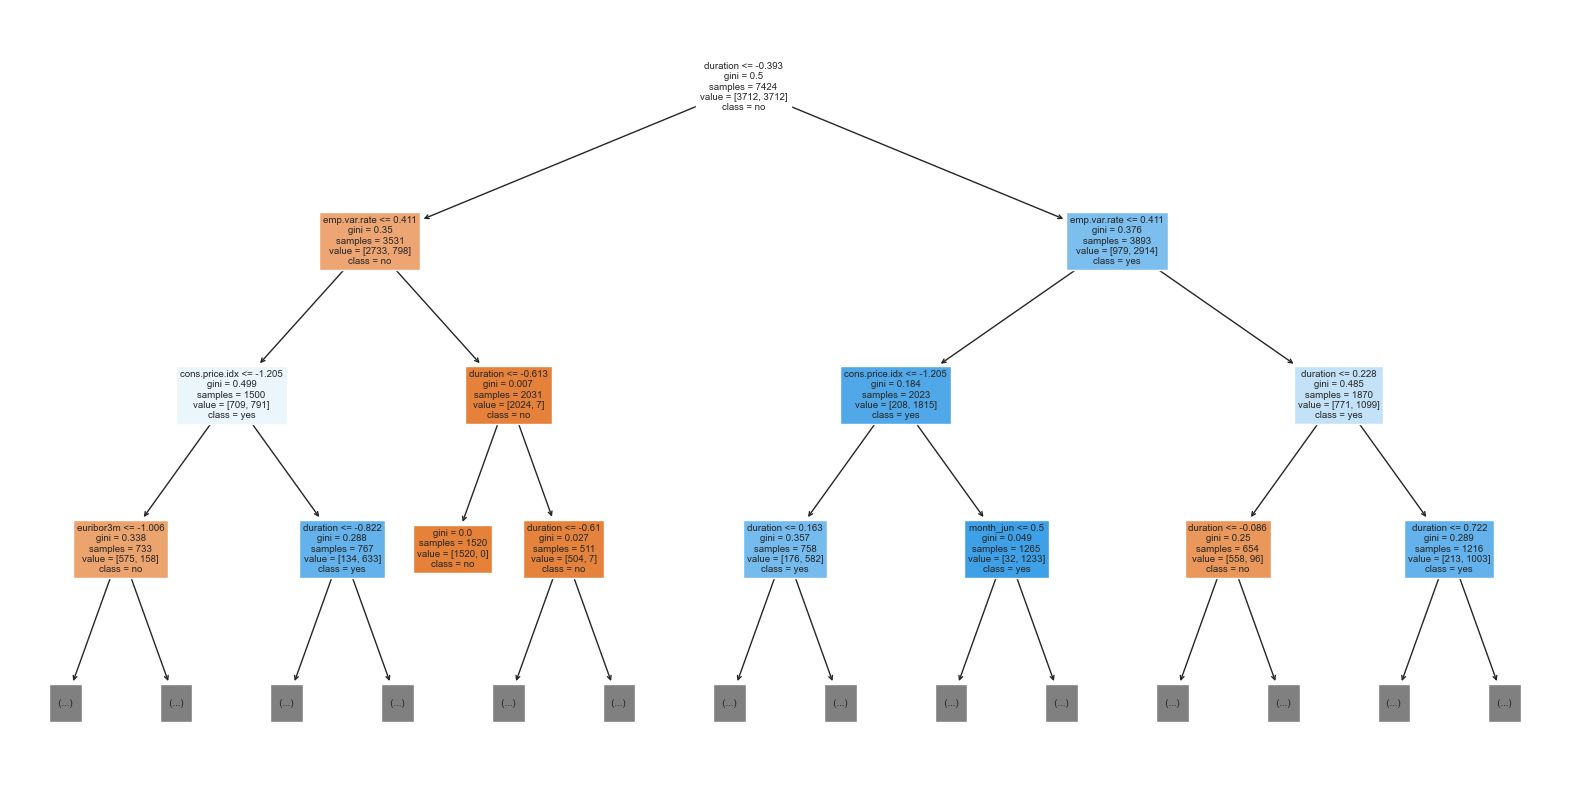

Best k for KNN in this fold: 2 with accuracy: 0.340

Decision Tree Model
              precision    recall  f1-score   support

           0       1.00      0.03      0.06      7309
           1       0.12      1.00      0.21       928

    accuracy                           0.14      8237
   macro avg       0.56      0.52      0.13      8237
weighted avg       0.90      0.14      0.08      8237


KNN Models
KNN with k=1
              precision    recall  f1-score   support

           0       0.98      0.20      0.34      7309
           1       0.13      0.97      0.24       928

    accuracy                           0.29      8237
   macro avg       0.56      0.59      0.29      8237
weighted avg       0.89      0.29      0.33      8237
KNN with k=2
              precision    recall  f1-score   support

           0       0.98      0.34      0.50      7309
           1       0.15      0.95      0.27       928

    accuracy                           0.41      8237
   macro avg      

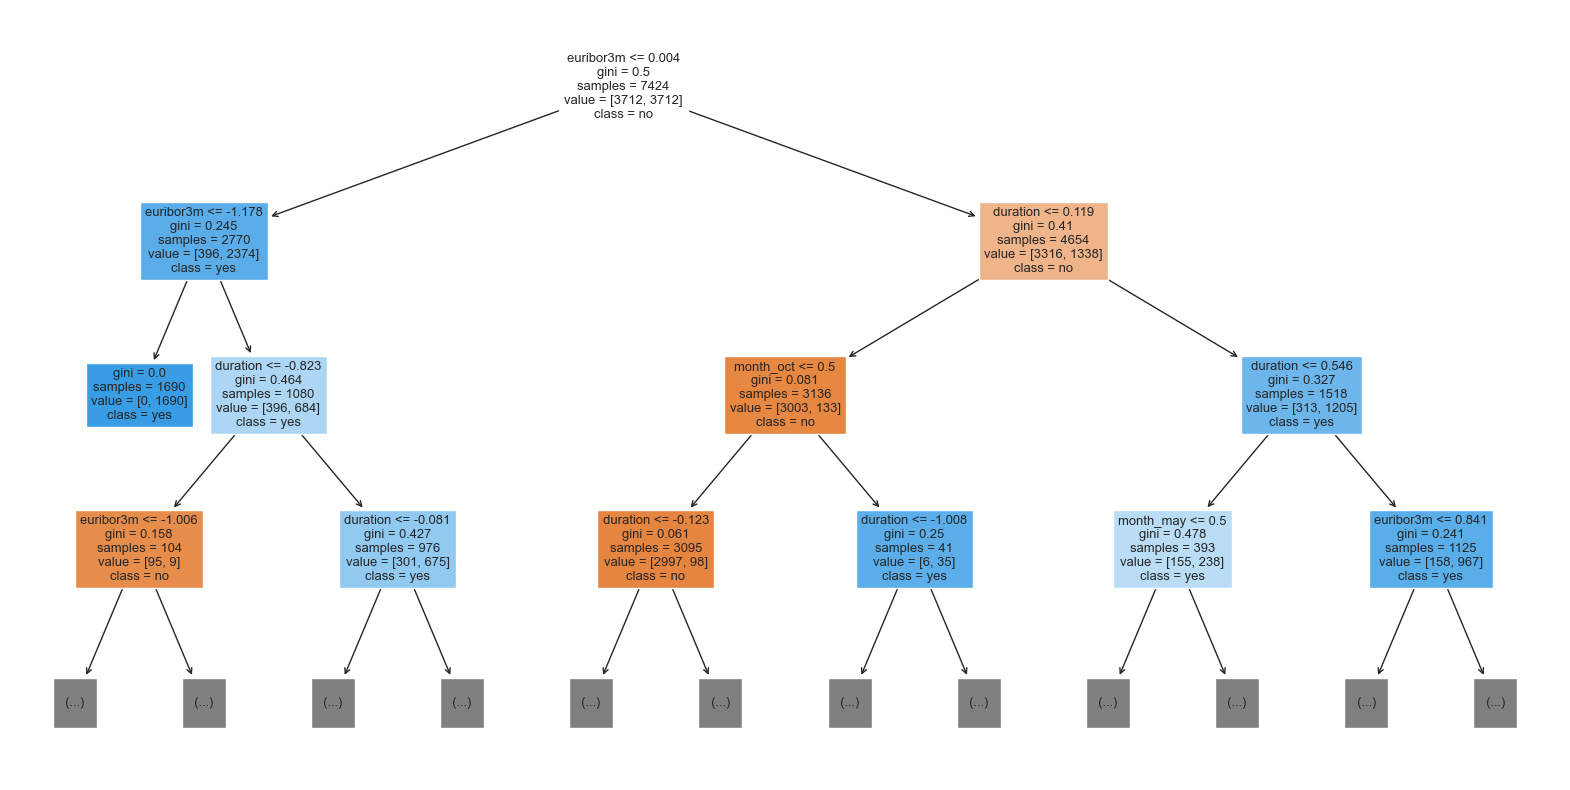

Best k for KNN in this fold: 2 with accuracy: 0.408


In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree

# Load data
bank_additional = pd.read_csv("Data/bank-additional/bank-additional/bank-additional-full.csv", delimiter=";")

# Specify column types
numerical_features = ['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
categorical_features = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']

# Preprocessor
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Classifier for Decision Tree
classifier_tree = DecisionTreeClassifier()

# Pipeline for Decision Tree
pipeline_tree = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', classifier_tree)])

# Data
X = bank_additional.drop('y', axis=1)
y = bank_additional['y'].apply(lambda x: 1 if x == 'yes' else 0)

k_values = range(1, 21)  # change this to the range you want to test
cv = StratifiedKFold(n_splits=5)

# CV with undersampling loop
for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    undersample = RandomUnderSampler(sampling_strategy='majority')
    X_under, y_under = undersample.fit_resample(X_train, y_train)

    # Decision Tree Classifier
    pipeline_tree.fit(X_under, y_under)
    y_pred_tree = pipeline_tree.predict(X_test)
    print("\nDecision Tree Model")
    print(classification_report(y_test, y_pred_tree))

    # KNN Classifier with k loop
    print("\nKNN Models")
    knn_results = []
    for k in k_values:
        classifier_knn = KNeighborsClassifier(n_neighbors=k)
        pipeline_knn = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', classifier_knn)])

        pipeline_knn.fit(X_under, y_under)
        y_pred_knn = pipeline_knn.predict(X_test)
        accuracy_knn = np.mean(y_test == y_pred_knn)
        knn_results.append(accuracy_knn)
        
        print(f'KNN with k={k}')
        print(classification_report(y_test, y_pred_knn))

    # Process the data with just the preprocessor
    preprocessedX = preprocessor.fit_transform(X_train)
    
    # Get the names of the one hot encoded features
    one_hot_features = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)
    
    # Combine with numerical features
    new_columns = np.array(numerical_features + list(one_hot_features))

    # Plot Decision Tree
    decision_tree = pipeline_tree['classifier']
    plt.figure(figsize=(20, 10))
    plot_tree(decision_tree, feature_names=new_columns, class_names=['no', 'yes'], filled=True, max_depth=3)  # limiting the max_depth for visibility
    plt.show()

    best_k = k_values[np.argmax(knn_results)]
    print(f'Best k for KNN in this fold: {best_k} with accuracy: {max(knn_results):.3f}')


    # You might want to break after the first fold, because the tree might be too large
    # break